# Premier League Analysis

In the following project, I'm doing an Exploratory Data Analysis to the 2022/2023 Premier League season. I have the data about all of the teams and their games (Opponent, Date, Result, Formation, Competition, Referee)

The goal of this project is to answer the following questions
1. Who has the most wins ?
2. Who has the most losses ?
3. Who has the most draws ?
4. Information about the formations (Most wins, losses, draws)
5. The championship course along the games

## Data Import and Cleaning

Importing the modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Importing the data 

In [3]:
import os

path = os.getcwd()
csv_files = []

for root, dirs, files in os.walk(path):
    for file in files:
        
        # Only getting the files with csv extension
        if(file.endswith(".csv")):
            csv_files.append(file)

csv_files

['Brentford-Stats.csv',
 'Chelsea-Stats.csv',
 'Everton-Stats.csv',
 'Liverpool-Stats.csv',
 'Aston-Villa-Stats.csv',
 'Brighton-and-Hove-Albion-Stats.csv',
 'Nottingham-Forest-Stats.csv',
 'Tottenham-Hotspur-Stats.csv',
 'Crystal-Palace-Stats.csv',
 'Manchester-United-Stats.csv',
 'Fulham-Stats.csv',
 'Wolverhampton-Wanderers-Stats.csv',
 'Newcastle-United-Stats.csv',
 'Southampton-Stats.csv',
 'West-Ham-United-Stats.csv',
 'Leicester-City-Stats.csv',
 'Leeds-United-Stats.csv',
 'Manchester-City-Stats.csv',
 'Bournemouth-Stats.csv',
 'Arsenal-Stats.csv']

Creating a dataframe for each team

In [4]:
dfs = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df[df['Date'] != "Date"])


We're going to print an example of the dataframes

In [5]:
dfs[2].head()

,Date,Venue,Result,Formation,Comp,Opponent,Referee
0,2022-08-06,Home,L,5-4-1,Premier League,Chelsea,Craig Pawson
1,2022-08-13,Away,L,3-4-3,Premier League,Aston Villa,Michael Oliver
2,2022-08-20,Home,D,3-4-3,Premier League,Nott'ham Forest,Andre Marriner
3,2022-08-23,Away,W,5-3-2,EFL Cup,Fleetwood Town,Tom Reeves
4,2022-08-27,Away,D,3-4-3,Premier League,Brentford,John Brooks


Now, we're going to show the head for the first 3 teams

In [6]:
for i in range(3):
    print(dfs[i].head(3))

         Date Venue Result Formation            Comp        Opponent  \
0  2022-08-07  Away      D     4-3-3  Premier League  Leicester City   
1  2022-08-13  Home      W     5-3-2  Premier League  Manchester Utd   
2  2022-08-20  Away      L     4-3-3  Premier League          Fulham   

          Referee  
0  Jarred Gillett  
1  Stuart Attwell  
2    Peter Bankes  
         Date Venue Result Formation            Comp      Opponent  \
0  2022-08-06  Away      W     3-4-3  Premier League       Everton   
1  2022-08-14  Home      D     3-5-2  Premier League     Tottenham   
2  2022-08-21  Away      L     3-5-2  Premier League  Leeds United   

          Referee  
0    Craig Pawson  
1  Anthony Taylor  
2  Stuart Attwell  
         Date Venue Result Formation            Comp         Opponent  \
0  2022-08-06  Home      L     5-4-1  Premier League          Chelsea   
1  2022-08-13  Away      L     3-4-3  Premier League      Aston Villa   
2  2022-08-20  Home      D     3-4-3  Premier Leagu

## Exploratory Data Analysis

The teams with the most wins

In [7]:
# Let's take the first team as an example

team = dfs[0]

team.head()

,Date,Venue,Result,Formation,Comp,Opponent,Referee
0,2022-08-07,Away,D,4-3-3,Premier League,Leicester City,Jarred Gillett
1,2022-08-13,Home,W,5-3-2,Premier League,Manchester Utd,Stuart Attwell
2,2022-08-20,Away,L,4-3-3,Premier League,Fulham,Peter Bankes
3,2022-08-23,Away,W,4-2-3-1,EFL Cup,Colchester Utd,James Linington
4,2022-08-27,Home,D,4-3-3,Premier League,Everton,John Brooks


Let's go on by calculating the number of wins, losses and draws

Text(0.5, 1.0, 'Win / Loss / Draw Pie chart')

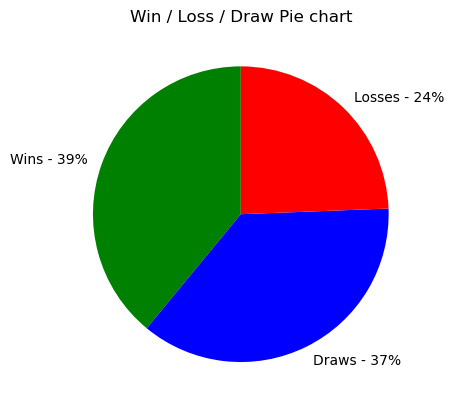

In [8]:
win_loss_draw_percentage = team['Result'].value_counts('W') * 100

labels = ["Wins",'Draws','Losses']

labels_with_percentage = [f'{label} - {round(percentage)}%' for label,percentage in zip(labels,win_loss_draw_percentage)]

colors = ['Green','Blue','Red']

plt.pie(win_loss_draw_percentage,labels=labels_with_percentage,colors=colors,startangle=90)
plt.title("Win / Loss / Draw Pie chart")

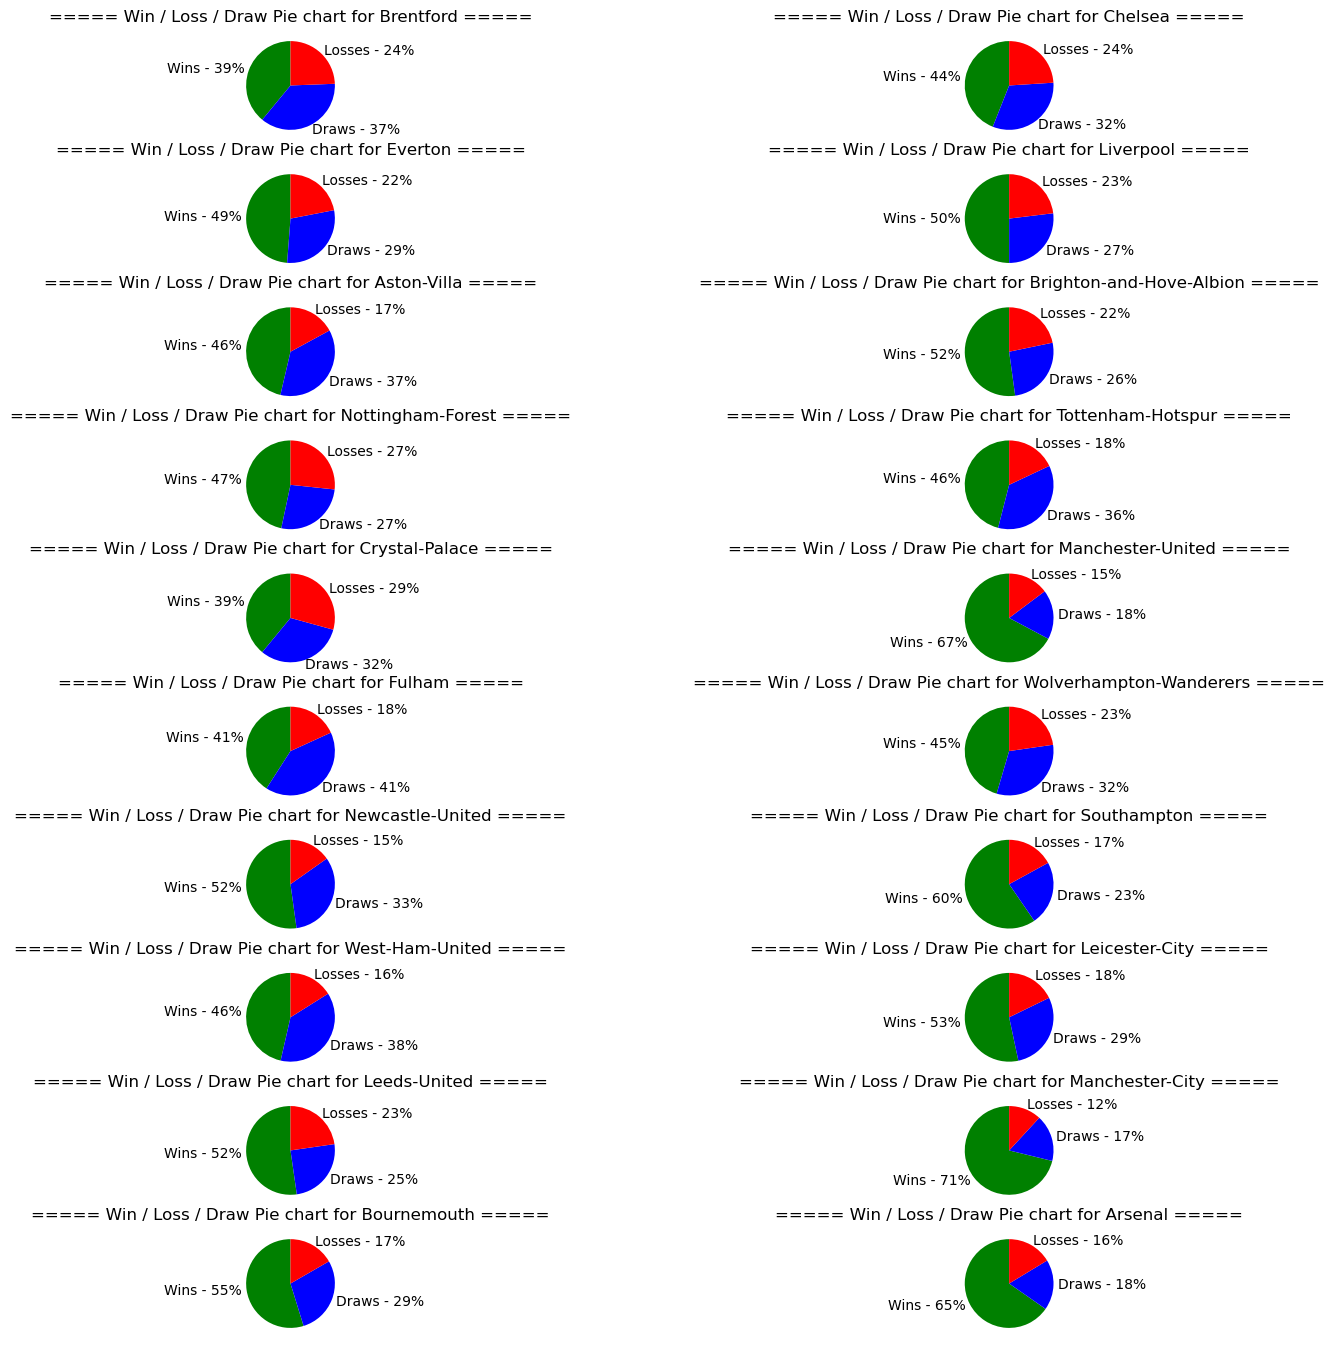

In [28]:
# We're getting the names of the teams
part_to_delete = "-Stats.csv"

# Creating subplots
teams_numbers = len(csv_files)

fig, axes = plt.subplots(nrows = round(teams_numbers / 2), ncols=2,figsize=(17,17))
for index,csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)
    df = df[df['Date'] != "Date"]
    
    team = csv_file.replace(part_to_delete, "")

    win_loss_draw_percentage = df['Result'].value_counts('W') * 100

    labels = ["Wins",'Draws','Losses']

    labels_with_percentage = [f'{label} - {round(percentage)}%' for label,percentage in zip(labels,win_loss_draw_percentage)]

    colors = ['Green','Blue','Red']

    row_index = index // 2
    col_index = index % 2

    axes[row_index, col_index].set_aspect('equal')  # Ensures a circular shape
    axes[row_index,col_index].pie(win_loss_draw_percentage,labels=labels_with_percentage,colors=colors,startangle=90)
    axes[row_index,col_index].set_title(f"===== Win / Loss / Draw Pie chart for {team} =====")
    


## Top 5 teams in wins, losses and draws

### Most Wins

In [10]:
# Creating the wins, losses, draws dataframe
part_to_delete = "-Stats.csv"

games_df = pd.DataFrame(columns=['Team','Win Count','Draw Count','Loss Count'])

for index,csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)
    df = df[df['Date'] != "Date"]
    
    team = csv_file.replace(part_to_delete, "")

    win_loss_draw_percentage = df[df['Comp'] == 'Premier League']['Result'].value_counts()

    new_row = {'Team':team, 
               'Win Count':win_loss_draw_percentage['W']
               ,'Draw Count':win_loss_draw_percentage['D'],
               'Loss Count':win_loss_draw_percentage['L']}

    games_df =  games_df.append(new_row,ignore_index=True)

games_df

,Team,Win Count,Draw Count,Loss Count
0,Brentford,15,14,9
1,Chelsea,11,11,16
2,Everton,8,12,18
3,Liverpool,19,10,9
4,Aston-Villa,18,7,13
5,Brighton-and-Hove-Albion,18,8,12
6,Nottingham-Forest,9,11,18
7,Tottenham-Hotspur,18,6,14
8,Crystal-Palace,11,12,15
9,Manchester-United,23,6,9


### Plot chart for the most wins in the Premier League and EFL

In [11]:
# Sorting the dataframe according to wins

most_wins_df = games_df.sort_values(by='Win Count', ascending=False)
most_losses_df = games_df.sort_values(by='Loss Count', ascending=False)
most_draws_df = games_df.sort_values(by='Draw Count', ascending=False)

In [12]:
most_wins_df

,Team,Win Count,Draw Count,Loss Count
17,Manchester-City,28,5,5
19,Arsenal,26,6,6
9,Manchester-United,23,6,9
3,Liverpool,19,10,9
12,Newcastle-United,19,14,5
4,Aston-Villa,18,7,13
5,Brighton-and-Hove-Albion,18,8,12
7,Tottenham-Hotspur,18,6,14
0,Brentford,15,14,9
10,Fulham,15,7,16


In [13]:
most_draws_df

,Team,Win Count,Draw Count,Loss Count
0,Brentford,15,14,9
12,Newcastle-United,19,14,5
2,Everton,8,12,18
8,Crystal-Palace,11,12,15
6,Nottingham-Forest,9,11,18
1,Chelsea,11,11,16
3,Liverpool,19,10,9
16,Leeds-United,7,10,21
5,Brighton-and-Hove-Albion,18,8,12
11,Wolverhampton-Wanderers,11,8,19


In [14]:
most_losses_df

,Team,Win Count,Draw Count,Loss Count
13,Southampton,6,7,25
15,Leicester-City,9,7,22
18,Bournemouth,11,6,21
16,Leeds-United,7,10,21
14,West-Ham-United,11,7,20
11,Wolverhampton-Wanderers,11,8,19
2,Everton,8,12,18
6,Nottingham-Forest,9,11,18
10,Fulham,15,7,16
1,Chelsea,11,11,16


Plotting the results in a bar chart

**Most Wins**

Text(0.5, 1.0, 'Number of Wins by Team')

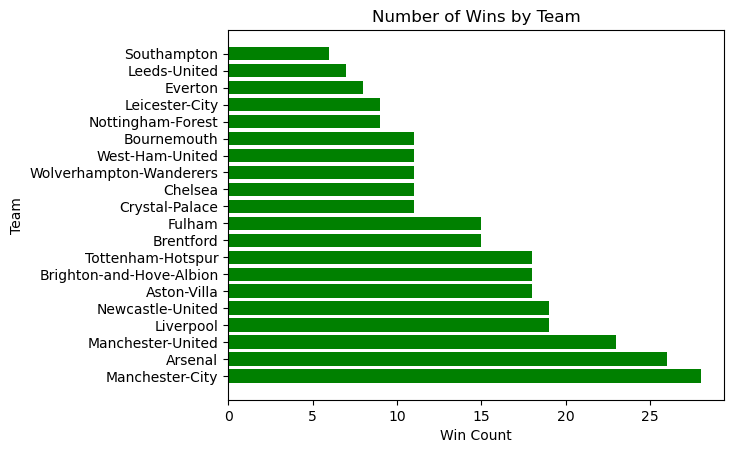

In [15]:
# Create a horizontal bar plot
plt.barh(most_wins_df['Team'], most_wins_df['Win Count'], color='green')

# Set the tick labels and their positions
plt.yticks(most_wins_df['Team'], most_wins_df['Team'])

# Set labels and title
plt.xlabel('Win Count')
plt.ylabel('Team')
plt.title('Number of Wins by Team')

**Most Draws**

Text(0.5, 1.0, 'Number of Draws by Team')

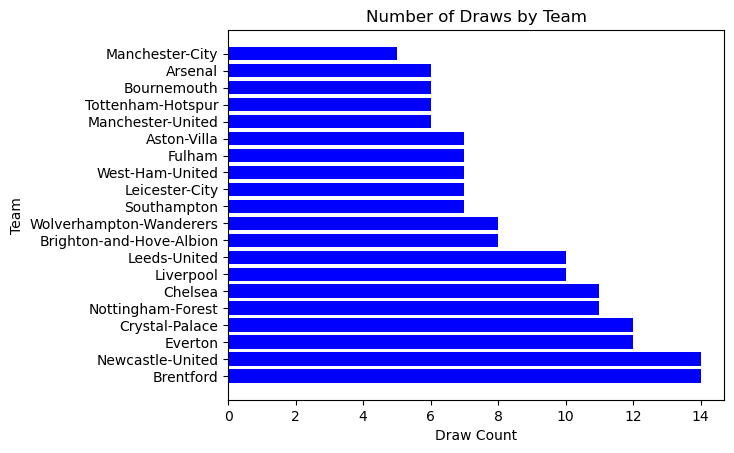

In [16]:
# Create a horizontal bar plot
plt.barh(most_draws_df['Team'], most_draws_df['Draw Count'], color='blue')

# Set the tick labels and their positions
plt.yticks(most_draws_df['Team'], most_draws_df['Team'])

# Set labels and title
plt.xlabel('Draw Count')
plt.ylabel('Team')
plt.title('Number of Draws by Team')

**Most Losses**

Text(0.5, 1.0, 'Number of Losses by Team')

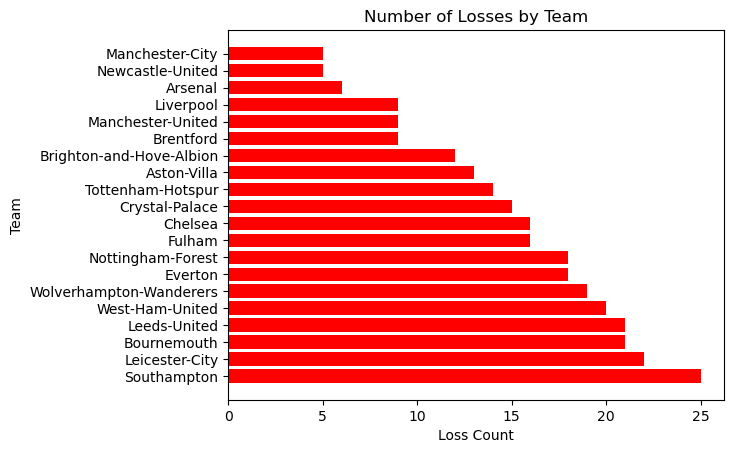

In [17]:
# Create a horizontal bar plot
plt.barh(most_losses_df['Team'], most_losses_df['Loss Count'], color='Red')

# Set the tick labels and their positions
plt.yticks(most_losses_df['Team'], most_losses_df['Team'])

# Set labels and title
plt.xlabel('Loss Count')
plt.ylabel('Team')
plt.title('Number of Losses by Team')

## Formations Analysis

In [18]:
# Appending all of the dataframes to create one big csv containing all of the games

all_games = pd.concat(dfs)

all_games

,Date,Venue,Result,Formation,Comp,Opponent,Referee
0,2022-08-07,Away,D,4-3-3,Premier League,Leicester City,Jarred Gillett
1,2022-08-13,Home,W,5-3-2,Premier League,Manchester Utd,Stuart Attwell
2,2022-08-20,Away,L,4-3-3,Premier League,Fulham,Peter Bankes
3,2022-08-23,Away,W,4-2-3-1,EFL Cup,Colchester Utd,James Linington
4,2022-08-27,Home,D,4-3-3,Premier League,Everton,John Brooks
...,...,...,...,...,...,...,...
45,2023-05-02,Home,W,4-3-3,Premier League,Chelsea,Robert Jones
46,2023-05-07,Away,W,4-3-3,Premier League,Newcastle Utd,Chris Kavanagh
47,2023-05-14,Home,L,4-3-3,Premier League,Brighton,Andy Madley
48,2023-05-20,Away,L,4-3-3,Premier League,Nott'ham Forest,Anthony Taylor


We group the dataframe by Formation

In [19]:
formation_grouped_df = all_games.pivot_table(index='Formation',columns='Result',aggfunc='size',fill_value=0)

formation_grouped_df = formation_grouped_df.sort_values(by='W',ascending=False)

In [20]:
# Taking the top 5 formations used in the Premier League

top_5_formations = formation_grouped_df.head()

top_5_formations

Result,D,L,W
Formation,,,
4-2-3-1,59,123,139
4-3-3,68,78,129
3-4-3,27,40,40
4-4-2,14,32,27
3-2-4-1,4,1,16


Text(0.5, 1.0, 'Bar Plot for Win/Loss/Draw by formation')

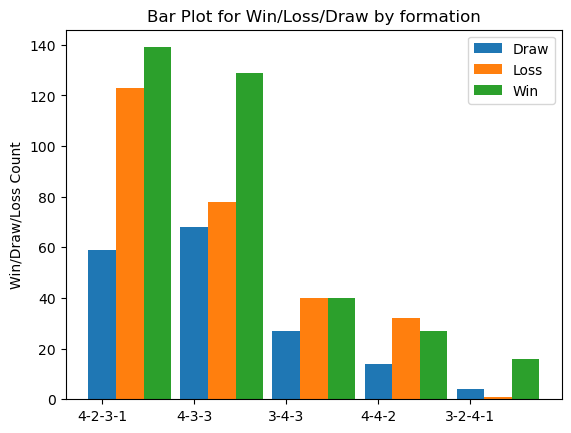

In [21]:
# Extract the data from the pivot table
formations = top_5_formations.index
results = top_5_formations.columns
data = top_5_formations.values

# Getting the number of bars
num_bars = len(formations)
bar_positions = np.arange(num_bars)

bar_width = 0.3

for i, result in enumerate(results):
    plt.bar(bar_positions + (i * bar_width), data[:, i], width=bar_width, label=result)

plt.xticks(bar_positions,formations)
plt.ylabel("Win/Draw/Loss Count")

plt.legend(['Draw','Loss','Win'])

plt.title("Bar Plot for Win/Loss/Draw by formation")


## Championship race

In this section, we will study the championship race showcasing the rank and points for each time over the games

In [22]:
# Calculating the final points for each team

games_df['Total Points'] = games_df['Win Count'] * 3 + games_df['Draw Count']

games_df.sort_values(by='Total Points',ascending=False)

,Team,Win Count,Draw Count,Loss Count,Total Points
17,Manchester-City,28,5,5,89
19,Arsenal,26,6,6,84
9,Manchester-United,23,6,9,75
12,Newcastle-United,19,14,5,71
3,Liverpool,19,10,9,67
5,Brighton-and-Hove-Albion,18,8,12,62
4,Aston-Villa,18,7,13,61
7,Tottenham-Hotspur,18,6,14,60
0,Brentford,15,14,9,59
10,Fulham,15,7,16,52


In [23]:
part_to_delete = "-Stats.csv"

points_df = pd.DataFrame(columns=['Date','Points'])
points_array = []

for index, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)
    df = df[(df['Date'] != "Date") & (df['Comp'] == 'Premier League')]
    team = csv_file.replace(part_to_delete, "")
    
    total_points = 0  # Reset total_points for each CSV file
    
    for _, row in df.iterrows():
        if row['Result'] == 'W':
            # In case of Win
            total_points += 3
            new_row = {'Date': row['Date'], 'Points': total_points}
        elif row['Result'] == 'L':
            # In case of Loss
            new_row = {'Date': row['Date'], 'Points': total_points}
        elif row['Result'] == 'D':
            # In case of Draw
            total_points += 1
            new_row = {'Date': row['Date'], 'Points': total_points + 1}

        points_df = points_df.append(new_row, ignore_index=True)

    points_array.append(points_df.copy())  # Append a copy of points_df to points_array
    points_df = points_df.iloc[0:0]  # Clear points_df for the next CSV file

points_array[9]


,Date,Points
0,2022-08-07,0
1,2022-08-13,0
2,2022-08-22,3
3,2022-08-27,6
4,2022-09-01,9
5,2022-09-04,12
6,2022-10-02,12
7,2022-10-09,15
8,2022-10-16,17
9,2022-10-19,19


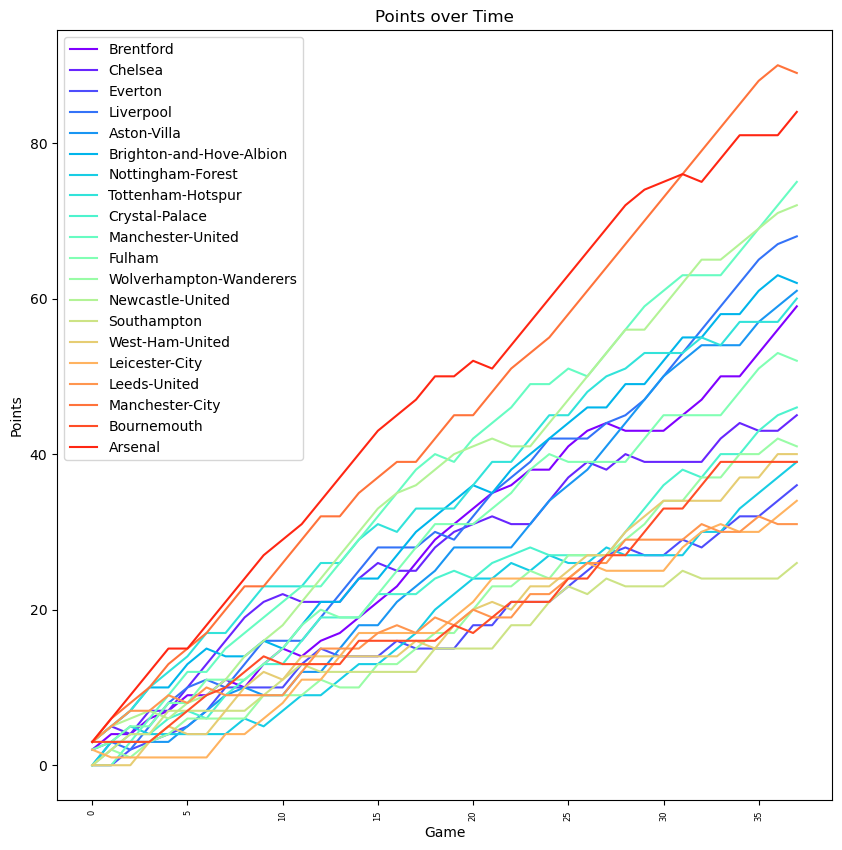

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

teams = []
for index, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file)
    df = df[(df['Date'] != "Date") & (df['Comp'] == 'Premier League')]
    team = csv_file.replace(part_to_delete, "")
    teams.append(team)

# Plotting all of the points for clubs along the year

fig, ax = plt.subplots(figsize=(10, 10))

# Generate a colormap based on the number of points_array
num_lines = len(points_array)
colors = cm.rainbow([i / num_lines for i in range(num_lines)])

for i, point_df in enumerate(points_array):
    ax.plot(range(38), point_df['Points'], color=colors[i])

# Set the rotation angle for x-axis labels
plt.xticks(rotation=90, fontsize=6)

# Add labels and title
plt.xlabel('Game')
plt.ylabel('Points')
plt.title('Points over Time')
plt.legend(teams)

plt.show()
